# DLPy (Transfer Learning)

#### Import Packages

In [2]:
%matplotlib inline
import swat 
import numpy as np 
import pandas as pd 
from dlpy.images import ImageTable
import dlpy.applications as apps
from dlpy.splitting import two_way_split
import getpass

#### Connection to CAS
If the machine hosting this notebook has a Linux OS, then you can use port 5570.<br>
If your machine has a Windows OS, you're only able to use port 8777 which is much slower.

In [ ]:
conn = swat.CAS('viya.server.at.domain.com', 8777, 'viya_user', getpass.getpass())
conn

#### Loading the images into CAS 

In [25]:
img_path = '/home/user/images'
my_images = ImageTable.load_files(conn, path=img_path)

In [26]:
my_images.head(3)

,_image_,_label_,_filename_0
0,���� JFIF      �� C ...,Type3,540_175.jpg
1,���� JFIF      �� C ...,Type3,364_15.jpg
2,���� JFIF      �� C ...,Type4,383_110.jpg


#### Display images

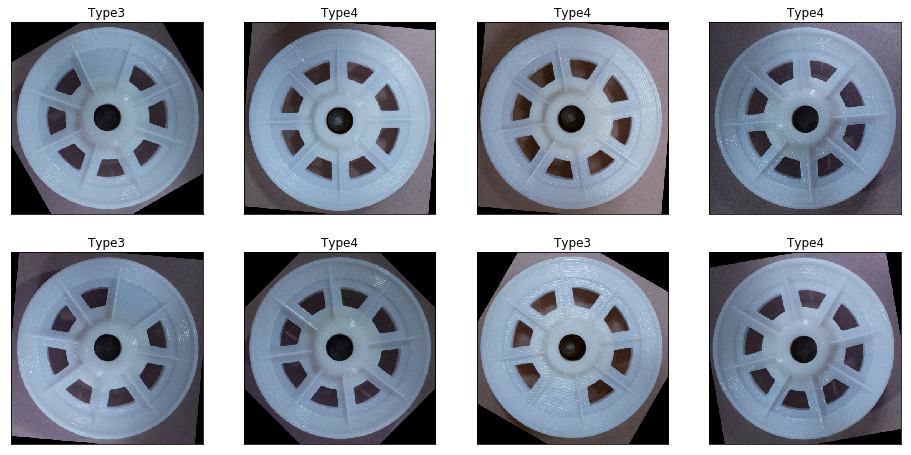

In [27]:
my_images.show(nimages=8, ncol=4, randomize=True)

#### Summarize class labels information in the table

In [28]:
my_images.label_freq

,Level,Frequency
Type3,1,864
Type4,2,864


#### Summarize the metadata of the images in the table

In [29]:
my_images.image_summary

jpg                  1728
minWidth              500
maxWidth              500
minHeight             500
maxHeight             500
meanWidth             500
meanHeight            500
mean1stChannel    134.495
min1stChannel           0
max1stChannel         255
mean2ndChannel     120.45
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    112.084
min3rdChannel           0
max3rdChannel         255
dtype: object

#### Resize images

In [30]:
my_images.resize(width=224, height=224, inplace=True)

In [31]:
my_images.image_summary

jpg                  1728
minWidth              224
maxWidth              224
minHeight             224
maxHeight             224
meanWidth             224
meanHeight            224
mean1stChannel    134.435
min1stChannel           0
max1stChannel         255
mean2ndChannel    120.359
min2ndChannel           0
max2ndChannel         255
mean3rdChannel        112
min3rdChannel           0
max3rdChannel         255
dtype: object

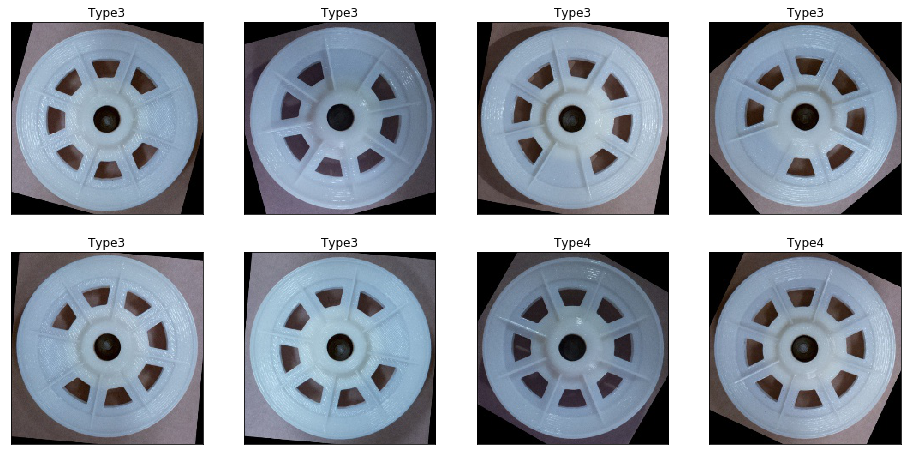

In [32]:
my_images.show(8,4)

#### Splitting the imageset into train and test sets

In [33]:
train_image, test_image = two_way_split(my_images, test_rate=20, seed=1234)
train_image.label_freq

,Level,Frequency
Type3,1,691
Type4,2,691


#### ResNet50_Caffe (with pre-trained weights)

In [34]:
model1 = apps.ResNet50_Caffe(
    conn, n_classes=2,
    pre_train_weight=True,
    pre_train_weight_file='/home/viya_user/resnet_model/ResNet-50-model.caffemodel.h5',
    include_top=False)

NOTE: Model table is attached successfully!
NOTE: Model is named to "resnet50_caffe" according to the model name in the table.


#### Train the model 

In [35]:
model1.print_summary()

*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1(Convo.)    |    (7, 7)     |   2    |  Identity  | (112, 112, 64)  |      9408 / 64       |
| bn_conv1(B.N.)   |     None      |  None  | Rectifier  | (112, 112, 64)  |       0 / 128        |
| pool1(Pool)      |    (3, 3)     |   2    |    Max     |  (56, 56, 64)   |        0 / 0         |
| res2a_branch2a...|    (1, 1)     |   1    |  Identity  |  (56, 56, 64)   |       4096 / 0       |
| bn2a_branch2a(...|     None      |  None  | Rectifier  |  (56, 56, 64)   |       0 / 128        |
| res2a_branch2b...|    (3, 3)     |   1    |  Identity  |  (56, 56, 64)   |      36864 / 0       |


In [36]:
model1.fit(train_image, mini_batch_size=16, max_epochs=20, optimizer=dict(algorithm=dict(method='adam', learningrate=.001)))

NOTE: Training based on existing weights.
NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 23512194.
NOTE:  The approximate memory cost is 27743.00 MB.
NOTE:  Loading weights cost       1.09 (s).
NOTE:  Initializing each layer cost       3.50 (s).
NOTE:  The total number of workers is 3.
NOTE:  The total number of threads on each worker is 8.
NOTE:  The total number of minibatch size per thread on each worker is 16.
NOTE:  The maximum number of minibatch size across all workers for the synchronous mode is 384.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:      2
NOTE:  Levels for the target variable:
NOTE:  Level      0: Type3
NOTE:  Level      1: Type4
NOTE:  Number of input variables:     1
NOTE:  Number of numeric input variables:      1
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      Time (s) (Training)
NOTE:        0              384   0.001          0.7128      0.4922         1.24
NOTE: 

NOTE:        0              384   0.001          389E-7           0         1.07
NOTE:        1              384   0.001          599E-7           0         1.08
NOTE:        2              384   0.001          423E-7           0         1.22
NOTE:        3              218   0.001          546E-7           0         1.07
NOTE:        4               12   0.001          469E-7           0         0.86
NOTE:         13           0.001       482E-7          0       113.99
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      Time (s) (Training)
NOTE:        0              384   0.001          361E-7           0         1.06
NOTE:        1              384   0.001          547E-7           0         1.07
NOTE:        2              384   0.001          391E-7           0         1.12
NOTE:        3              218   0.001          501E-7           0         1.28
NOTE:        4               12   0.001          432E-7           0         0.84
NOTE:         14         

,Descr,Value
0,Model Name,resnet50_caffe
1,Model Type,Convolutional Neural Network
2,Number of Layers,126
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,53
6,Number of Pooling Layers,2
7,Number of Fully Connected Layers,0
8,Number of Batch Normalization Layers,53
9,Number of Residual Layers,32


#### Test the model

In [14]:
model1.predict(test_image)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           294
 1  Number of Observations Used           294
 2  Misclassification Error (%)       1.70068
 3                   Loss Error      0.053657

[OutputCasTables]

                 casLib              Name  Rows  Columns  \
 0  CASUSERHDFS(sspint)  Valid_Res_yvOjYt   294        8   
 
                                             casTable  
 0  CASTable(u'Valid_Res_yvOjYt', caslib=u'CASUSER...  

+ Elapsed: 8.67s, user: 69.4s, sys: 19.2s, mem: 2.6e+04mb

In [15]:
model1.heat_map_analysis(data=train_image)

NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.


ERROR: Value 0 was found for parameter 'samppct', but the parameter must be greater than 0.
ERROR: The action stopped due to errors.


SWATError: Error parsing action parameters.

In [37]:
model1.save_to_astore('/home/viya_user/trained_model')

NOTE: Model astore file saved successfully.


In [19]:
model1.save_to_table('/tmp')

NOTE: Model table saved successfully.
